# Upload dataframe

In [1]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/actMath_11.csv')



In [2]:
# Drop ID and extra labels. 
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_diff', 'is_proficient'])


In [3]:
one_hot_encoded_df2.head()

,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,...,course_YearbkII9-12,course_Yearbook9-12,course_YrbkIII9-12,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy
0,0.529412,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
1,0.529412,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
2,0.941176,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3,0.941176,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
4,0.941176,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [4]:
one_hot_encoded_df2.columns.tolist()

['proficient_score',
 'course_ACT Review',
 'course_ACT/WK Rev.',
 'course_ACTReview.5C',
 'course_AG Communica',
 'course_AIDE-ELEM',
 'course_AIDE-LIB',
 'course_ALG I B ACCE',
 'course_ALIITRIGH/A',
 'course_ARMY LET I',
 'course_ARMY LET II',
 'course_ARMY LET III',
 'course_ARMY LET IV',
 'course_ARMYLETIVACT',
 'course_AcAdv.Baseba',
 'course_AcAdv.Basket',
 'course_AcAdv.CrossC',
 'course_AcAdv.Footb',
 'course_AcAdv.Softba',
 'course_AcAdv.Volley',
 'course_Accounting',
 'course_Adv BTA',
 'course_Advanced Agr',
 'course_Agriscience',
 'course_Alg Esntls B',
 'course_Alg II/Trig',
 'course_AlgEnrichmet',
 'course_AlgII/TrigAC',
 'course_Algebra I',
 'course_Algebra I A',
 'course_Algebra I B',
 'course_Algebra II',
 'course_AlgebraicCon',
 'course_Anat/Physio',
 'course_Anthropology',
 'course_Art App',
 'course_BAND MARCH',
 'course_BANDCONCERT',
 'course_BANDMARCHAUX',
 'course_BIOLOGY ADV',
 'course_Bak & Pstr A',
 'course_BandConcer.5',
 'course_BandConcer1C',
 'course_Band

# Start of Modeling

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd


In [6]:
# Step 1: Prepare the data
X = one_hot_encoded_df2.drop('proficient_score', axis=1)
y = one_hot_encoded_df2['proficient_score']


In [7]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Cross-Validated MSE: 0.02
[0]	train-rmse:0.20284	eval-rmse:0.18728
[1]	train-rmse:0.19454	eval-rmse:0.17972
[2]	train-rmse:0.18747	eval-rmse:0.17353
[3]	train-rmse:0.18152	eval-rmse:0.16844
[4]	train-rmse:0.17642	eval-rmse:0.16385
[5]	train-rmse:0.17205	eval-rmse:0.16020
[6]	train-rmse:0.16801	eval-rmse:0.15678
[7]	train-rmse:0.16493	eval-rmse:0.15449
[8]	train-rmse:0.16195	eval-rmse:0.15228
[9]	train-rmse:0.15980	eval-rmse:0.15097
[10]	train-rmse:0.15777	eval-rmse:0.14955
[11]	train-rmse:0.15603	eval-rmse:0.14826
[12]	train-rmse:0.15462	eval-rmse:0.14752
[13]	train-rmse:0.15321	eval-rmse:0.14653
[14]	train-rmse:0.15205	eval-rmse:0.14568
[15]	train-rmse:0.15066	eval-rmse:0.14477
[16]	train-rmse:0.14970	eval-rmse:0.14426
[17]	train-rmse:0.14882	eval-rmse:0.14372
[18]	train-rmse:0.14816	eval-rmse:0.14327
[19]	train-rmse:0.14756	eval-rmse:0.14298
[20]	train-rmse:0.14695	eval-rmse:0.14276
[21]	train-rmse:0.14620	eval-rmse:0.14211
[22]	train-rmse:0.14581	eval-rmse:0.14187
[23]	train-rmse:0.

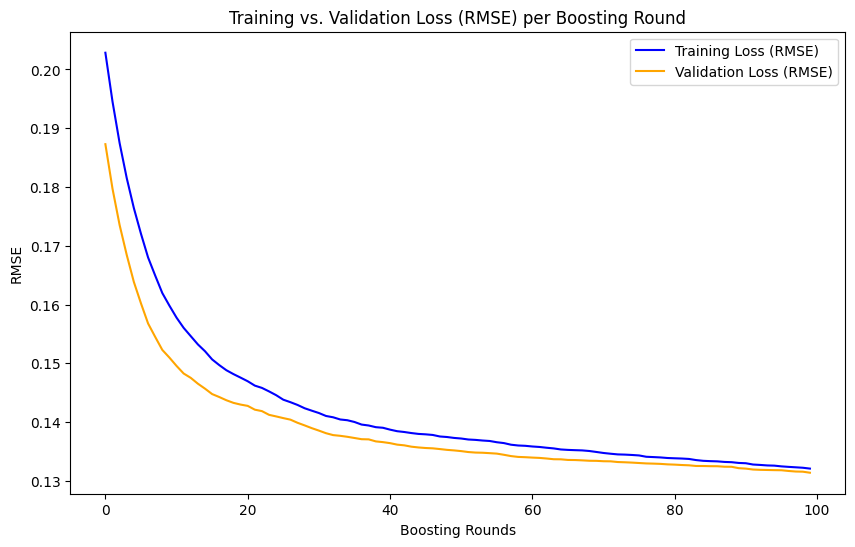

XGBoost - MSE: 0.02, R²: 0.55, RMSE: 0.13


In [8]:
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBRegressor with additional regularization
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# cross validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE: {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

params = {
    'max_depth': 6, 
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping, tracking both training and validation losses
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract train and eval loss from evals_result
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred = xgb_model_trained.predict(dtest)

# Evaluate the model's performance on the test set
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


Resulting metrics: XGBoost - MSE: 0.02, R²: 0.55, RMSE: 0.13

### Calculating feature importance


Feature Importances:
course_Algebra I B: 74.0
course_Alg II/Trig: 60.0
course_D&TSafetyEd: 49.0
course_DRIVERS ED: 39.0
course_VarFBII: 38.0
course_ALIITRIGH/A: 35.0
course_ARMY LET II: 35.0
course_Health 9-12: 32.0
course_Found AAVTC: 31.0
course_Spanish 1: 28.0
iready_math: 28.0
course_Food Nutritn: 26.0
course_StudyHall912: 25.0
course_FACS: 24.0
course_Fit/Cond: 24.0
course_LIFE PE 9-12: 24.0
course_Spanish 2: 24.0
course_Algebra II: 23.0
course_Eng Gr10 Adv: 23.0
course_USHis I Adv: 23.0
course_ContempIss1C: 22.0
course_Geometry Adv: 21.0
course_Per Finance: 21.0
course_Theatre I: 21.0
course_VisArtI.5C: 21.0
course_Multimed Pub: 20.0
course_Phy Sci Adv: 20.0
course_Vis Arts I: 20.0
course_AIDE-ELEM: 19.0
course_FAM  CON SC: 19.0
course_VarBsbalII: 19.0
course_Vis Arts II: 19.0
course_Alg Esntls B: 18.0
course_LAW IN SOCIE: 18.0
course_MusicalDrama: 18.0
course_Agriscience: 17.0
course_CareerPrep-B: 17.0
course_ChemistryAdv: 17.0
course_Fund Agrisci: 17.0
course_Intermed Agr: 17.

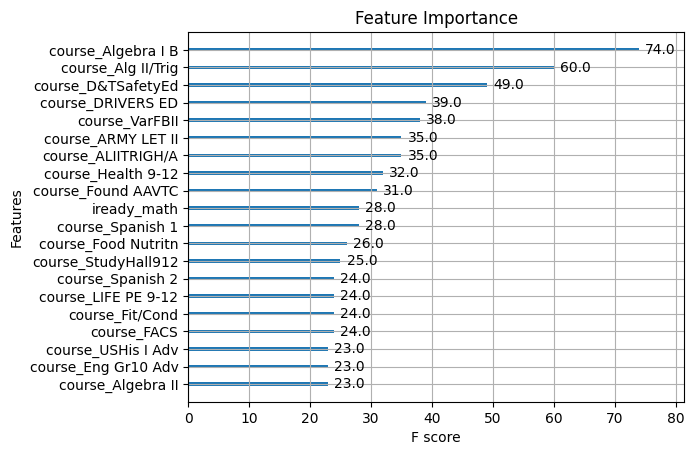

In [9]:
# Calculate feature importance
feature_importances = xgb_model_trained.get_score(importance_type='weight')
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
print("\nFeature Importances:")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")

# Visualize feature importance
from xgboost import plot_importance
plot_importance(xgb_model_trained, max_num_features=20)  # Show top 20 features
plt.title('Feature Importance')
plt.show()

### calculate feature importances with pearson correlation of feature and label

In [52]:
import pandas as pd

# Calculate feature importance
feature_importances = xgb_model_trained.get_score(importance_type='weight')

# Convert feature importance into a DataFrame
importance_df = pd.DataFrame(
    list(feature_importances.items()),
    columns=['Feature', 'Importance']
)

# Calculate correlation of each feature with the label
correlations = []
for feature in importance_df['Feature']:
    if feature in X.columns:  # Ensure the feature exists in the original dataset
        corr = X[feature].corr(y)  # Pearson correlation
        correlations.append(corr)
    else:
        correlations.append(None)  # Handle cases where feature names mismatch (if any)

# Add correlation to the DataFrame
importance_df['Correlation'] = correlations

# Add positive/negative correlation indication
importance_df['Correlation_Sign'] = importance_df['Correlation'].apply(
    lambda x: 'Positive' if x > 0.1 else 'Negative' if x < -0.1 else 'Neutral'
)

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
importance_df[importance_df['Importance'] > 20].reset_index()


,index,Feature,Importance,Correlation,Correlation_Sign
0,25,course_Algebra I B,74.0,-0.295038,Negative
1,21,course_Alg II/Trig,60.0,0.449038,Positive
2,54,course_D&TSafetyEd,49.0,0.126555,Positive
3,55,course_DRIVERS ED,39.0,0.083763,Neutral
4,147,course_VarFBII,38.0,-0.012734,Neutral
5,7,course_ALIITRIGH/A,35.0,0.280454,Positive
6,9,course_ARMY LET II,35.0,0.070104,Neutral
7,83,course_Health 9-12,32.0,0.100102,Positive
8,72,course_Found AAVTC,31.0,-0.001372,Neutral
9,125,course_Spanish 1,28.0,0.103435,Positive


In [50]:
#visualize positive correlation
importance_df[importance_df['Correlation'] > 0.1]

,Feature,Importance,Correlation,Correlation_Sign
21,course_Alg II/Trig,60.0,0.449038,Positive
54,course_D&TSafetyEd,49.0,0.126555,Positive
7,course_ALIITRIGH/A,35.0,0.280454,Positive
83,course_Health 9-12,32.0,0.100102,Positive
125,course_Spanish 1,28.0,0.103435,Positive
126,course_Spanish 2,24.0,0.153687,Positive
59,course_Eng Gr10 Adv,23.0,0.508477,Positive
140,course_USHis I Adv,23.0,0.420032,Positive
78,course_Geometry Adv,21.0,0.122290,Positive
46,course_ChemistryAdv,17.0,0.555685,Positive


In [28]:
#visualize negaitve correlation
importance_df[importance_df['Correlation'] < -0.1]

,Feature,Importance,Correlation,Correlation_Sign
25,course_Algebra I B,74.0,-0.295038,Negative
112,course_Physical Sci,8.0,-0.292758,Negative
61,course_English Gr10,6.0,-0.255488,Negative
141,course_USHis I G10,5.0,-0.199470,Negative
138,course_US His-1877,2.0,-0.135922,Negative


In [41]:
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(X_train['iready_math'], y_train)
print(f'Spearman Correlation: {spearman_corr}')


Spearman Correlation: -0.06524619076022928


## visualize important features vs. labels

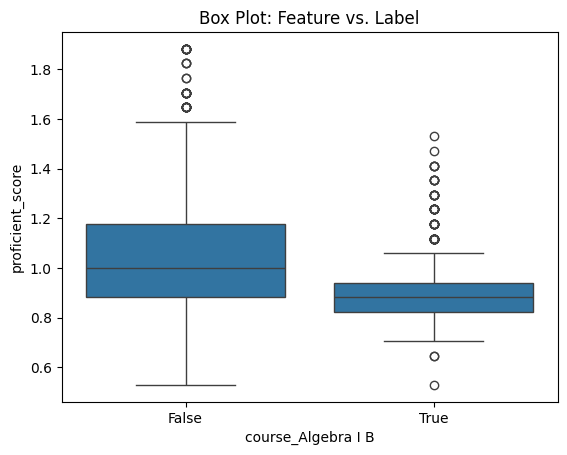

In [31]:
import seaborn as sns

sns.boxplot(x=X_train['course_Algebra I B'], y=y_train)
plt.title('Box Plot: Feature vs. Label')
plt.show()


### partial dependence plots

[0]	validation_0-rmse:0.18788
[1]	validation_0-rmse:0.18091
[2]	validation_0-rmse:0.17537
[3]	validation_0-rmse:0.17044
[4]	validation_0-rmse:0.16669
[5]	validation_0-rmse:0.16361
[6]	validation_0-rmse:0.16032
[7]	validation_0-rmse:0.15805
[8]	validation_0-rmse:0.15625
[9]	validation_0-rmse:0.15492
[10]	validation_0-rmse:0.15332
[11]	validation_0-rmse:0.15230
[12]	validation_0-rmse:0.15172
[13]	validation_0-rmse:0.15071
[14]	validation_0-rmse:0.14997
[15]	validation_0-rmse:0.14947
[16]	validation_0-rmse:0.14895
[17]	validation_0-rmse:0.14869
[18]	validation_0-rmse:0.14831
[19]	validation_0-rmse:0.14803
[20]	validation_0-rmse:0.14777
[21]	validation_0-rmse:0.14748
[22]	validation_0-rmse:0.14680
[23]	validation_0-rmse:0.14668
[24]	validation_0-rmse:0.14616
[25]	validation_0-rmse:0.14560
[26]	validation_0-rmse:0.14536
[27]	validation_0-rmse:0.14524
[28]	validation_0-rmse:0.14491
[29]	validation_0-rmse:0.14410
[30]	validation_0-rmse:0.14384
[31]	validation_0-rmse:0.14368
[32]	validation_0-

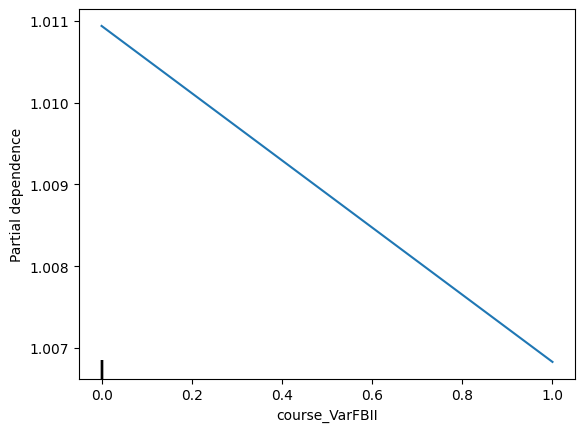

In [43]:
from sklearn.inspection import PartialDependenceDisplay
# Fit the model using XGBRegressor
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# PDP: Plot Partial Dependence for a specific feature
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(xgb_model, X_train, ['course_VarFBII'])
plt.show()




[0]	validation_0-rmse:0.18788
[1]	validation_0-rmse:0.18091
[2]	validation_0-rmse:0.17537
[3]	validation_0-rmse:0.17044
[4]	validation_0-rmse:0.16669
[5]	validation_0-rmse:0.16361
[6]	validation_0-rmse:0.16032
[7]	validation_0-rmse:0.15805
[8]	validation_0-rmse:0.15625
[9]	validation_0-rmse:0.15492
[10]	validation_0-rmse:0.15332
[11]	validation_0-rmse:0.15230
[12]	validation_0-rmse:0.15172
[13]	validation_0-rmse:0.15071
[14]	validation_0-rmse:0.14997
[15]	validation_0-rmse:0.14947
[16]	validation_0-rmse:0.14895
[17]	validation_0-rmse:0.14869
[18]	validation_0-rmse:0.14831
[19]	validation_0-rmse:0.14803
[20]	validation_0-rmse:0.14777
[21]	validation_0-rmse:0.14748
[22]	validation_0-rmse:0.14680
[23]	validation_0-rmse:0.14668
[24]	validation_0-rmse:0.14616
[25]	validation_0-rmse:0.14560
[26]	validation_0-rmse:0.14536
[27]	validation_0-rmse:0.14524
[28]	validation_0-rmse:0.14491
[29]	validation_0-rmse:0.14410
[30]	validation_0-rmse:0.14384
[31]	validation_0-rmse:0.14368
[32]	validation_0-

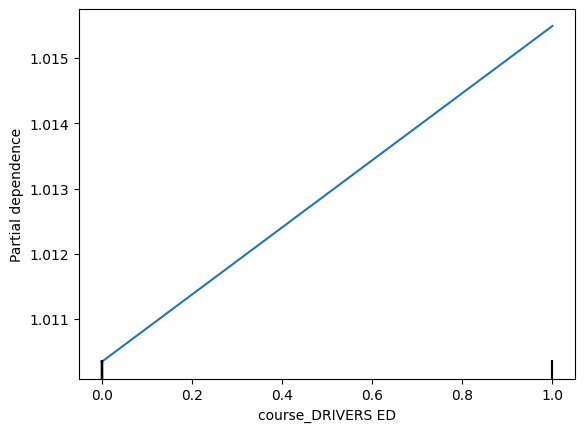

In [39]:
from sklearn.inspection import PartialDependenceDisplay
# Fit the model using XGBRegressor
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# PDP: Plot Partial Dependence for a specific feature
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(xgb_model, X_train, ['course_DRIVERS ED'])
plt.show()




## Guide for feature interaction: (from my notes)


To determine if a feature interacts with others, has non-linear relationships, or is collinear, you can use a variety of statistical and visualization techniques. Here's how you can identify each scenario:

1. Interactions with Other Features
Interactions occur when the effect of one feature on the label depends on the value of another feature.

#### How to Identify:
Tree-based Feature Importance:
Models like XGBoost and Random Forest naturally account for interactions. High importance for a feature in these models may indicate its interactions with other features.

Partial Dependence Plots (PDP):
Visualize how two features together impact the label by plotting the predicted output while varying two features simultaneously.
Libraries: sklearn.inspection.plot_partial_dependence or SHAP dependence plots.

SHAP Interaction Values:
SHAP can calculate and display feature interaction values, showing how a feature's contribution changes depending on the value of another feature.
2. Non-Linear Relationships
Non-linear relationships are when changes in a feature do not result in proportional changes in the label.

#### How to Identify:

Scatter Plots:
Plot the feature against the label to visually inspect for non-linear patterns (e.g., quadratic or exponential relationships).

Correlation Analysis:
A low Pearson correlation but strong predictive importance suggests a potential non-linear relationship.

Feature Engineering:
Experiment with transformations (e.g., log, square root, polynomial) and check if they improve correlation or model performance.

Non-Linear Models:
Compare a simple linear regression model's performance with a tree-based model. If the latter significantly outperforms the former, non-linear relationships may be present.

3. Collinearity
Collinearity occurs when two or more features are highly correlated with each other, leading to redundancy.

#### How to Identify:
Correlation Matrix:
Compute a correlation matrix for all features (df.corr() in pandas) and identify pairs with high absolute values (e.g., > 0.8 or < -0.8).
Variance Inflation Factor (VIF):

Measures how much the variance of a feature is inflated due to collinearity. High VIF (> 5 or 10) indicates multicollinearity.

Code Example:
python
Copy code
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

**PCA (Principal Component Analysis):**
High collinearity often results in a few principal components explaining most of the variance. Check the explained variance ratio.

Combining Techniques
**SHAP Values:**
Use SHAP to analyze both feature importance and interactions. SHAP interaction values explicitly show the strength of interaction between features.

**Cross-Feature Engineering:**
Create interaction features manually (e.g., products or ratios of two features) and observe their correlation or importance in the model.

**Residual Analysis:**
Train a simple model and analyze residuals. If residuals show patterns when plotted against a feature, it indicates interactions or non-linear effects.

Tools to Use
Visualization: Matplotlib, Seaborn (scatter plots, heatmaps, pairplots).
Statistical Libraries: Statsmodels for VIF, SHAP for interactions.
Interpretability Libraries: SHAP, LIME, and PDPBox.
